#**Select Numerical Input Features**

#What is Feature Selection?

Feature selection is the process of identifying and selecting a subset of input features that are
most relevant to the target variable. Feature selection is often straightforward when working
with real-valued input and output data, such as using the Pearson's correlation coefficient, but
can be challenging when working with numerical input data and a categorical target variable.
The two most commonly used feature selection methods for numerical input data when the
target variable is categorical (e.g. classification predictive modeling) are the ANOVA F-test
statistic and the mutual information statistic. 

In this tutorial, you will discover how to perform
feature selection with numerical input data for classification. After completing this tutorial, you
will learn:
* The diabetes predictive modeling problem with numerical inputs and binary classification
target variables.
* How to evaluate the importance of numerical features using the ANOVA F-test and mutual
information statistics.
* How to perform feature selection for numerical data when fitting and evaluating a classification model.

Adapted from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

##Diabetes Dataset
The dataset classifies patient data as
either an onset of diabetes within five years or not. 
```
Number of Instances: 768
Number of Attributes: 8 plus class 
For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
Missing Attribute Values: Yes
Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")
   Class Value  Number of instances
   0            500
   1            268
```

You can learn more about the dataset here:

* Diabetes Dataset File ([pima-indians-diabetes.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv))
* Diabetes Dataset Details ([pima-indians-diabetes.names](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names))

##Download Diabetes data files

In [1]:
!pip install wget
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv" -o pima-indians-diabetes.csv
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names" -o pima-indians-diabetes.names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=11c9edfd9ca576ac56be12f4309ae62b1b5838ebc8de2b0d73d3c0fbdf372a30
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under pima-indians-diabetes.csv

Saved under pima-indians-diabetes.names


Loading and splitting Diabetes data

In [2]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y
  
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (514, 8) (514,)
Test (254, 8) (254,)


##Numerical Feature Selection
There are two popular feature selection techniques that can be used for numerical input data
and a categorical (class) target variable. They are:
* ANOVA F-Statistic.
* Mutual Information Statistics.



###**ANOVA F-test Feature Selection**
ANOVA is an acronym for analysis of variance and is a parametric statistical hypothesis test for
determining whether the means from two or more samples of data (often three or more) come
from the same distribution or not. An F-statistic, or F-test, is a class of statistical tests that
calculate the ratio between variances values, such as the variance from two different samples or
the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method
is a type of F-statistic referred to here as an ANOVA F-test.

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as
numerical input variables and categorical target variable in a classification task. The results
of this test can be used for feature selection where those features that are independent of the
target variable can be removed from the dataset.

In [3]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


In this case, we can see that some features stand out as perhaps being more relevant than
others, with much larger test statistic values. Perhaps features 1, 5, and 7 are most relevant.

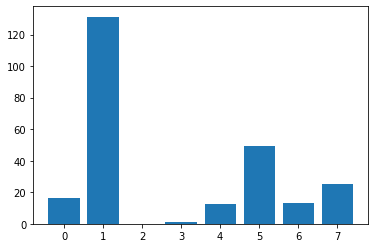

In [4]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

A bar chart of the feature importance scores for each input feature is created. This clearly
shows that feature 1 might be the most relevant (according to test statistic) and that perhaps
six of the eight input features are the most relevant. We could set k=6 when configuring the
SelectKBest to select these six features.

###**Mutual Information Feature Selection**
Mutual information from the field of information theory is the application of information gain
(typically used in the construction of decision trees) to feature selection. Mutual information is
calculated between two variables and measures the reduction in uncertainty for one variable given
a known value of the other variable. Mutual information is straightforward when considering
the distribution of two discrete (categorical or ordinal) variables, such as categorical input and
categorical output data. Nevertheless, it can be adapted for use with numerical input and
categorical output.

In [5]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
  
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.032155
Feature 1: 0.092785
Feature 2: 0.051834
Feature 3: 0.000000
Feature 4: 0.024504
Feature 5: 0.086664
Feature 6: 0.019210
Feature 7: 0.037579


In this case, we can see that some of the features have a modestly low score, suggesting that
perhaps they can be removed. Perhaps features 1 and 5 are most relevant.

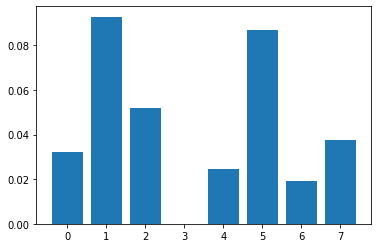

In [6]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

A bar chart of the feature importance scores for each input feature is created. Importantly,
a different mixture of features is promoted.

##Modeling With Selected Features
 A robust approach is to evaluate models using different
feature selection methods (and numbers of features) and select the method that results in a
model with the best performance.

###**Model Built Using All Features**

In [7]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y
  
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


In this case, we can see that the model achieves a classification accuracy of about 77 percent.
We would prefer to use a subset of features that achieves a classification accuracy that is as
good or better than this.

###**Model Built Using ANOVA F-test Features**
We can use the ANOVA F-test to score the features and select the four most relevant features.

In [8]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=f_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
  
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


In this case, we see that the model achieved an accuracy of about 78.74 percent, a lift in
performance compared to the baseline that achieved 77.56 percent.

###**Model Built Using Mutual Information Features**
We can repeat the experiment and select the top four features using a mutual information
statistic.

In [9]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=mutual_info_classif, k=4) # mutual_info_classif()
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
  
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.17


In this case, we can make no difference compared to the baseline model. This is interesting
as we know the method chose a different four features compared to the previous method.

###Tune the Number of Selected Features
Instead of guessing, we can systematically test a range
of different numbers of selected features and discover which results in the best performing
model. This is called a **grid search**, where the k argument to the SelectKBest class can be
tuned. It is good practice to evaluate model configurations on classification tasks using repeated
stratified k-fold cross-validation. We will use three repeats of 10-fold cross-validation via the
RepeatedStratifiedKFold class.

In [10]:
# compare different numbers of features selected using anova f-test
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y

# define dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
print(grid)
# define the grid search
# Exhaustive search over specified parameter values for an estimator.
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

{'anova__k': [1, 2, 3, 4, 5, 6, 7, 8]}
Best Mean Accuracy: 0.770
Best Config: {'anova__k': 5}


In this case, we can see that the best number of selected features is five; that achieves an
accuracy of about 77 percent.

We might want to see the relationship between the number of selected features and classification accuracy. In this relationship, we may expect that more features result in a better
performance to a point. This relationship can be explored by manually evaluating each configuration of **k** for the SelectKBest, gathering the sample of accuracy scores, and
plotting the results using box and whisker plots side-by-side.

In [11]:
# compare different numbers of features selected using anova f-test
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  dataset = read_csv(filename, header=None)
  # retrieve numpy array
  data = dataset.values
  # split into input (X) and output (y) variables
  X = data[:, :-1]
  y = data[:,-1]
  return X, y

# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
  
# define dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
  # create pipeline
  model = LogisticRegression(solver='liblinear')
  fs = SelectKBest(score_func=f_classif, k=k)
  pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))


>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


In this case, it looks like selecting five or seven features results in roughly the same accuracy.

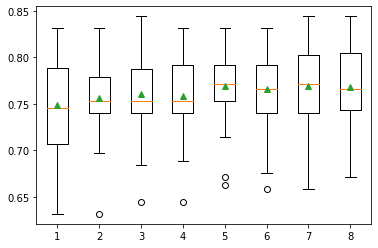

In [12]:
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()